## Lead Scoring Case Study

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
df = pd.read_csv('Leads.csv')
print('Shape of the df:', df.shape)
df.head(3)

Shape of the df: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
#Checking for duplicate rows
sum(df.duplicated(subset = 'Prospect ID'))

0

There is no duplicate row with respect to 'Prospect ID'

In [4]:
#The statistical insight about the dataframe
df.describe(include = 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,c4d68ab2-7680-44c6-b654-50bb22fa438a,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [5]:
#list of columns
print(list(df))

['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [6]:
#identify numerical and non-numerical columns automatically
NonNumCols = []
NumCols = []

for col in list(df):
    if df[col].dtypes == 'object':
        NonNumCols.append(col)
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical columns:
 ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [7]:
#Value counts in each non-num columns
NonNumCols_list = NonNumCols.copy()
NonNumCols_list.remove('Prospect ID')
for i in NonNumCols_list:
    print(i, '------------->','\n', df[i].value_counts())

Lead Origin -------------> 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Lead Source -------------> 
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
blog                    1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
Do Not Email -------------> 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64
Do Not Call -------------> 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64


In [8]:
#Number (non zero) of 'Select' in different columns
df_str = df.copy()
df_str = df_str.astype(str)
lst = list(df_str)
for i in lst:
    length = len(df_str[df_str[i] == 'Select'])
    if length != 0:
        print(i, ':', length)

Specialization : 1942
How did you hear about X Education : 5043
Lead Profile : 4146
City : 2249


### Data Cleaning and EDA

In [9]:
#We can see that there are many 'Select' values in multiple columns
#Most probably the 'Select' value is coming from a dropdown option, where one needed to chose an option. 
#So its equivalent to NAN value.
#Let's make all the 'Selecet' to NAN
df_corrected = df.replace('Select', np.nan)
#Below is the checking whether we have any 'Select' left or not
df_corrected1 = df_corrected.copy()
df_corrected1 = df_corrected1.astype(str)
lst = list(df_corrected1)
for i in lst:
    length = len(df_corrected1[df_corrected1[i] == 'Select'])
    if length == 0:
        print('There is no Select')
        break

There is no Select


In [10]:
#Let's check whether we have any column with only one unique value. If it is so, we can drop those columns 
#safely, as these will not have any predictive power
df_dropped = df_corrected.loc[:,df_corrected.nunique()!=1]
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 32)


In [11]:
#Let's see what are the columns we have removed in the previous cell
single_unique = [x for x in list(df_corrected) if x not in list(df_dropped)]
print('List of clumns with one unique vale: ', single_unique)

List of clumns with one unique vale:  ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


#### Below are the columns where we have extremely high perecentage of only one value. Better to remove these, as these will not have insignificant predictive power.

In [12]:
#Checking distribution of values in 'X Education Forums' column
print('Percentage of values:')
df_dropped['X Education Forums'].value_counts()*100/df_dropped['X Education Forums'].value_counts().sum()

Percentage of values:


No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [13]:
#Checking distribution of values in 'Search' column
print('Percentage of values:')
df_dropped['Search'].value_counts()*100/df_dropped['Search'].value_counts().sum()

Percentage of values:


No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [14]:
#Checking distribution of values in 'Newspaper Article' column
print('Percentage of values:')
df_dropped['Newspaper Article'].value_counts()*100/df_dropped['Newspaper Article'].value_counts().sum()

Percentage of values:


No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [15]:
#Checking distribution of values in 'Newspaper' column
print('Percentage of values:')
df_dropped['Newspaper'].value_counts()*100/df_dropped['Newspaper'].value_counts().sum()

Percentage of values:


No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [16]:
#Checking distribution of values in 'Through Recommendations' column
print('Percentage of values:')
df_dropped['Through Recommendations'].value_counts()*100/df_dropped['Through Recommendations'].value_counts().sum()

Percentage of values:


No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [17]:
#Checking distribution of values in 'Digital Advertisement' column
print('Percentage of values:')
df_dropped['Digital Advertisement'].value_counts()*100/df_dropped['Digital Advertisement'].value_counts().sum()

Percentage of values:


No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [18]:
#Let's dropp the above columns
df_dropped.drop(['X Education Forums', 'Search', 'Newspaper Article', 'Newspaper', 'Through Recommendations', 'Digital Advertisement'], axis = 1, inplace = True)
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 26)


In [19]:
#'Prospect ID': A unique ID with which the customer is identified.
#So 'Prospect ID' should not have any impact on our modelling and we can remove this column
df_dropped = df_dropped.drop('Prospect ID', axis = 1)
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 25)


In [20]:
#percentage of null values (non zero) in differend columns
col_list = list(df_dropped)
null = []
for i in df_dropped.isnull().sum()*100/df.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,Lead Source,0.389610
6,TotalVisits,1.482684
8,Page Views Per Visit,1.482684
9,Last Activity,1.114719
10,Country,26.634199
11,Specialization,36.580087
12,How did you hear about X Education,78.463203
13,What is your current occupation,29.112554
14,What matters most to you in choosing a course,29.318182
15,Tags,36.287879


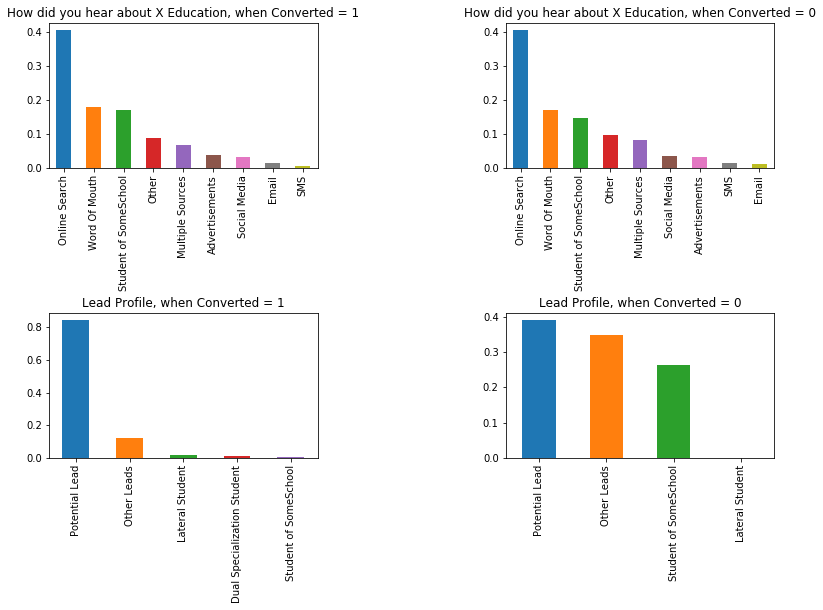

In [21]:
#'How did you hear about X Education' and 'Lead Profile' are with very high (>70%) null values.
#Let's see how important these columns are
fig = plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
df_dropped[df_dropped['Converted'] == 1]['How did you hear about X Education'].value_counts(normalize=True).plot(kind="bar")
plt.title('How did you hear about X Education, when Converted = 1')

plt.subplot(2,2,2)
df_dropped[df_dropped['Converted'] == 0]['How did you hear about X Education'].value_counts(normalize=True).plot(kind="bar")
plt.title('How did you hear about X Education, when Converted = 0')

plt.subplot(2,2,3)
df_dropped[df_dropped['Converted'] == 1]['Lead Profile'].value_counts(normalize=True).plot(kind="bar")
plt.title('Lead Profile, when Converted = 1')

plt.subplot(2,2,4)
df_dropped[df_dropped['Converted'] == 0]['Lead Profile'].value_counts(normalize=True).plot(kind="bar")
plt.title('Lead Profile, when Converted = 0')

plt.subplots_adjust(wspace = .7, hspace = 1)

* From the plots above we can see that there is no correlation between 'Converted' and 'How did you hear about X Education' variables. For example, irrespective of whether a lead is converted or not the normalized value of 'Online Search' and 'Word of Mouth' are same (for Converted = 1 & 0). So we can drop the 'How did you hear about X Education' column safely.
* Interestingly, the 'Lead Profile' has a good correlation with the 'Converetd' variable. There is a higher chance of 'Potential Lead's to get converetd (=1).

In [22]:
#Dropping the 'How did you hear about X Education' column
df_dropped = df_dropped.drop('How did you hear about X Education', axis = 1)
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 24)


In [23]:
#Althogh the 'Lead Profile' has very good correlation but it has very high null value (74.2%) and we dont have any good strategy
#to impute all these missing values. So, better to drop this column also
df_dropped.drop('Lead Profile', axis = 1, inplace = True)

In [24]:
#'Country' column has 26.6% missing values
#Let's see distribution of countries
df_dropped['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Canada                   0.059006
Nigeria                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Germany                  0.059006
Sweden                   0.044254
Italy                    0.029503
Ghana                    0.029503
Philippines              0.029503
China                    0.029503
Belgium                  0.029503
Uganda                   0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
Bangladesh               0.029503
Indonesia                0.014751
Russia        

Almost all values (~96%) are India. So, it would be a logical thing to impute the missing values in 'Country' column by the most frequent value India.

In [25]:
#Imputing the missing values in 'Country' column
df_dropped['Country'] = df_dropped['Country'].replace(np.nan, 'India')
df_dropped['Country'].isnull().values.any() #Checking null values in the 'Country' column

False

Now there is no NAN value in the 'Country' column

 Specialization 
Unique values: [nan 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']


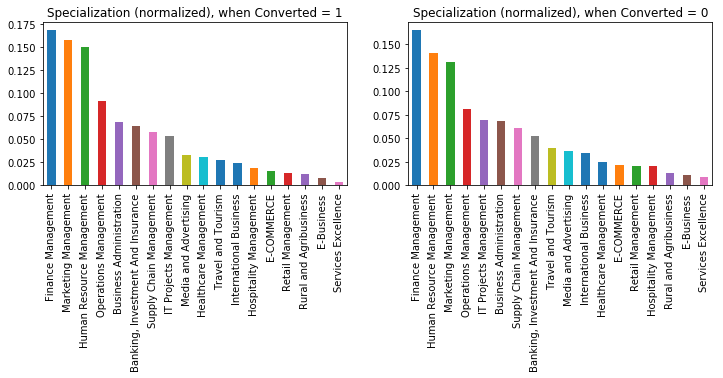

In [26]:
#Now let's see the 'Specialization' (36.6% NAN) column
print('\033[1m Specialization \033[1m')

print('Unique values:', df_dropped['Specialization'].unique())

fig = plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
df_dropped[df_dropped['Converted'] == 1]['Specialization'].value_counts(normalize=True).plot(kind='bar')
plt.title('Specialization (normalized), when Converted = 1')

plt.subplot(1,2,2)
df_dropped[df_dropped['Converted'] == 0]['Specialization'].value_counts(normalize=True).plot(kind='bar')
plt.title('Specialization (normalized), when Converted = 0')

plt.subplots_adjust(wspace = 0.2)

In [27]:
#Here in case of the 'Specialization' column, the distribution of values are same in case of Converted = 0 & 1
#The most frequent value is 'Finance Management' and the second most frequent one is 'Human Resource Management'
#These two values are so similar in number it might be risky to impute the missing value by only either of the two.
#That is why a better strategy would be to create a new value 'Unknown' and replace the NAN values with it.
df_dropped['Specialization'].fillna('Unknown', inplace = True)
df_dropped['Specialization'].isnull().values.any() #Checking null values in the 'Specialization' column

False

 What is your current occupation 
Unique values: ['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']


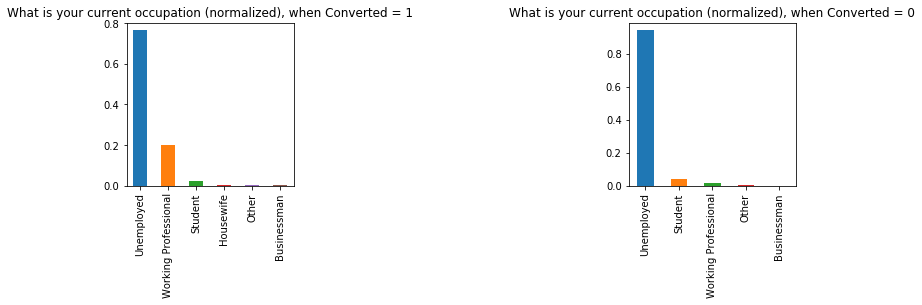

In [28]:
#'What is your current occupation' columns has ~29% null values
print('\033[1m What is your current occupation \033[1m')

print('Unique values:', df_dropped['What is your current occupation'].unique())

fig = plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
df_dropped[df_dropped['Converted'] == 1]['What is your current occupation'].value_counts(normalize=True).plot(kind='bar')
plt.title('What is your current occupation (normalized), when Converted = 1')

plt.subplot(1,2,2)
df_dropped[df_dropped['Converted'] == 0]['What is your current occupation'].value_counts(normalize=True).plot(kind='bar')
plt.title('What is your current occupation (normalized), when Converted = 0')

plt.subplots_adjust(wspace = 2)

Here 'Unemployed' is the most frequent value in the 'What is your current occupation' column and also we can see that irrespective of a lead is converetd or not, the 'Uneployed' value is the dominating. So, it is quite possible that this column will not be of much value for our modelling. For the time being we will impute the missing values with 'Uneployed' and move ahead

In [29]:
#Imputing null values in 'What is your current occupation' column
df_dropped['What is your current occupation'] = df_dropped['What is your current occupation'].replace(np.nan, 'Uneployed')
df_dropped['What is your current occupation'].isnull().values.any() #Checking null values in the 'What is your current occupation' column

False

In [30]:
#'What matters most to you in choosing a course' has ~29% null values
print('Normalized Unique Values:', '\n', df_dropped['What matters most to you in choosing a course'].value_counts(normalize= True)*100)

Normalized Unique Values: 
 Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64


Almost 100% value is 'Better Career Prospects'. Surely this columne will not have any significant impact on our modelling. So, better to drop this column to reduce the dimensionality.

In [31]:
#Dropping the 'What matters most to you in choosing a course' column
df_dropped = df_dropped.drop('What matters most to you in choosing a course', axis = 1)
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 22)


 Tags 
Unique values: ['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


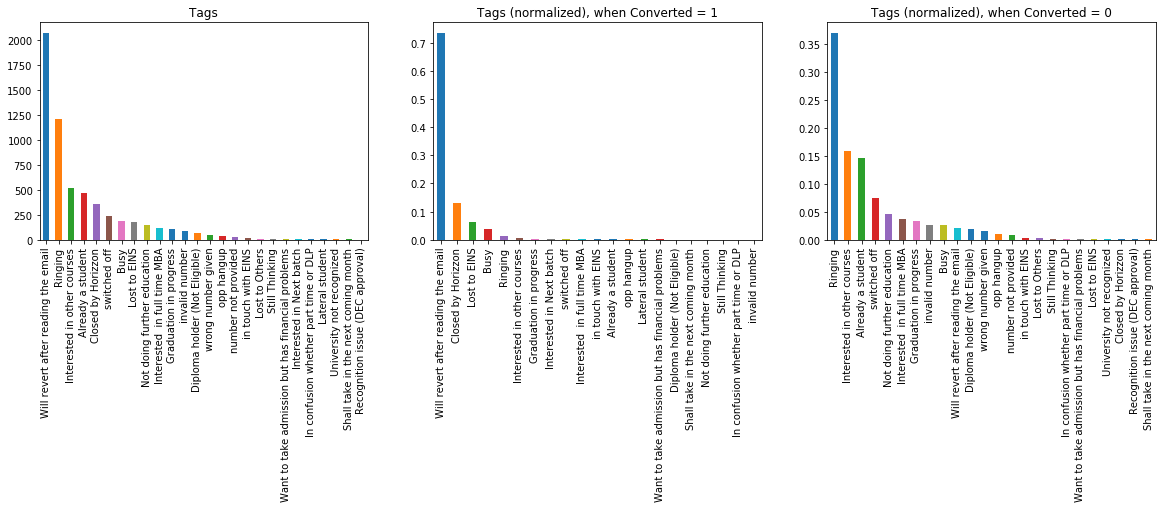

In [32]:
#The 'Tags' column has ~36% null values
print('\033[1m Tags \033[1m')

print('Unique values:', df_dropped['Tags'].unique())

fig = plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
df_dropped['Tags'].value_counts().plot(kind='bar')
plt.title('Tags')

plt.subplot(1,3,2)
df_dropped[df_dropped['Converted'] == 1]['Tags'].value_counts(normalize=True).plot(kind='bar')
plt.title('Tags (normalized), when Converted = 1')

plt.subplot(1,3,3)
df_dropped[df_dropped['Converted'] == 0]['Tags'].value_counts(normalize=True).plot(kind='bar')
plt.title('Tags (normalized), when Converted = 0')

plt.subplots_adjust(wspace = 0.2)

This is an interesting column:
1. We have ~36% null values
2. 'Will revert after reading the email' is the most frequent value and the second most frequent value is 'Ringing'
3. When 'Converetd' = 1, ~70% cases the value is 'Will revert after reading the email' and when 'Converetd' = 0, ~35% cases the column value is 'Ringing'

Clearly this column has huge predictive power.

In [33]:
#Let's see the distribution of the 'Will revert after reading the email' and 'Ringing'
print('Distribution of Will revert after reading the email, with respect to the Converted column', '\n', df_dropped[df_dropped['Tags'] == 'Will revert after reading the email']['Converted'].value_counts(normalize = True)*100)
print('Ringing, with respect to the Converted column', '\n', df_dropped[df_dropped['Tags'] == 'Ringing']['Converted'].value_counts(normalize = True)*100)

Distribution of Will revert after reading the email, with respect to the Converted column 
 1    96.862934
0     3.137066
Name: Converted, dtype: float64
Ringing, with respect to the Converted column 
 0    97.173732
1     2.826268
Name: Converted, dtype: float64


So, ~97% of the 'Will revert after reading the email' values fall in the Converted = 1 category.
And coincidentally, 97% of the 'Ringing' values fall in the Converted = 0 value. 

In [34]:
#Without any bias, let's creat a new value 'Unknown'
df_dropped['Tags'].fillna("Unknown", inplace = True)
df_dropped['Tags'].isnull().values.any() #Checking null values in the 'Tags' column

False

 Lead Quality 
Unique values: ['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']


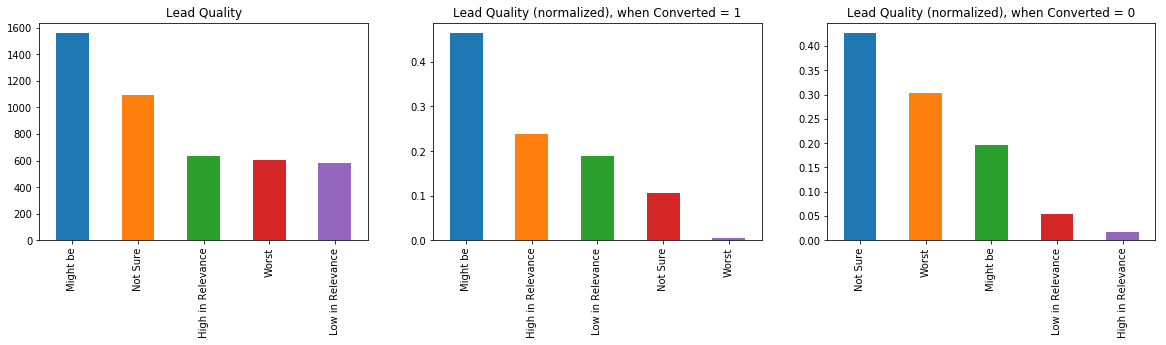

In [35]:
#Let's move to the 'Lead Quality' column now, it has ~52% null values
print('\033[1m Lead Quality \033[1m')

print('Unique values:', df_dropped['Lead Quality'].unique())

fig = plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
df_dropped['Lead Quality'].value_counts().plot(kind='bar')
plt.title('Lead Quality')

plt.subplot(1,3,2)
df_dropped[df_dropped['Converted'] == 1]['Lead Quality'].value_counts(normalize=True).plot(kind='bar')
plt.title('Lead Quality (normalized), when Converted = 1')

plt.subplot(1,3,3)
df_dropped[df_dropped['Converted'] == 0]['Lead Quality'].value_counts(normalize=True).plot(kind='bar')
plt.title('Lead Quality (normalized), when Converted = 0')

plt.subplots_adjust(wspace = 0.2)

In [36]:
#Let's see the distribution of the 'Might be' and 'Not Sure'
print('Might be, with respect to the Converted column', '\n', df_dropped[df_dropped['Lead Quality'] == 'Might be']['Converted'].value_counts(normalize = True)*100)
print('Not Sure, with respect to the Converted column', '\n', df_dropped[df_dropped['Lead Quality'] == 'Not Sure']['Converted'].value_counts(normalize = True)*100)

Might be, with respect to the Converted column 
 1    75.576923
0    24.423077
Name: Converted, dtype: float64
Not Sure, with respect to the Converted column 
 0    75.641026
1    24.358974
Name: Converted, dtype: float64


In [37]:
#Without any bias, let's creat a new value 'Unknown'
df_dropped['Lead Quality'].fillna("Unknown", inplace = True)
df_dropped['Lead Quality'].isnull().values.any() #Checking null values in the 'Lead Quality' column

False

 City 
Unique values: [nan 'Mumbai' 'Thane & Outskirts' 'Other Metro Cities' 'Other Cities'
 'Other Cities of Maharashtra' 'Tier II Cities']


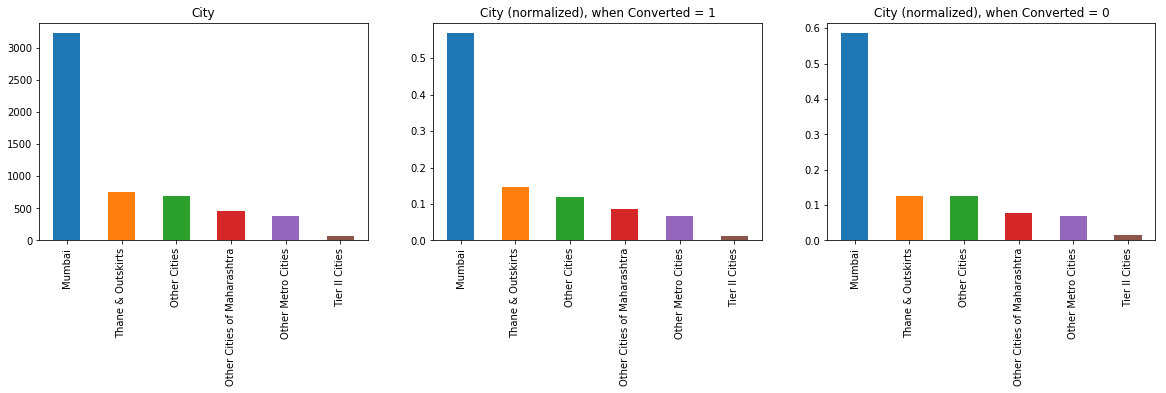

In [38]:
#The 'City' column has ~40% null values
print('\033[1m City \033[1m')

print('Unique values:', df_dropped['City'].unique())

fig = plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
df_dropped['City'].value_counts().plot(kind='bar')
plt.title('City')

plt.subplot(1,3,2)
df_dropped[df_dropped['Converted'] == 1]['City'].value_counts(normalize=True).plot(kind='bar')
plt.title('City (normalized), when Converted = 1')

plt.subplot(1,3,3)
df_dropped[df_dropped['Converted'] == 0]['City'].value_counts(normalize=True).plot(kind='bar')
plt.title('City (normalized), when Converted = 0')

plt.subplots_adjust(wspace = 0.2)

Looks like this column has less predictive power. The most frequent value is 'Mumbai'

In [39]:
#Imputing the missing values in 'City' column with 'Mumbai'
df_dropped['City'].fillna('Mumbai', inplace = True)
df_dropped['City'].isnull().values.any() #Checking null values in the 'City' column

False

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64


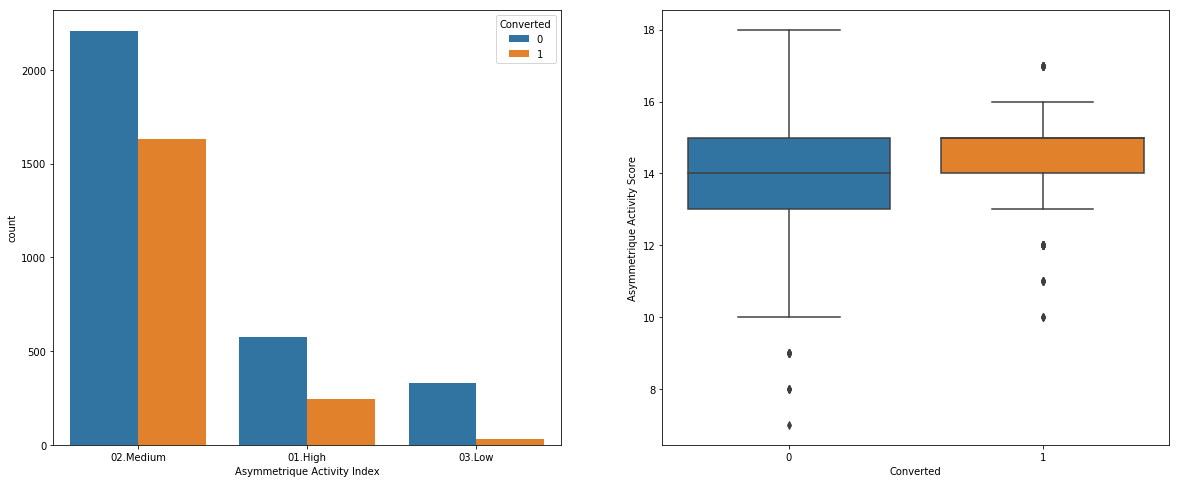

In [40]:
#Both the "Asymmetrique Activity Index" and 'Asymmetrique Activity Score' columns has 45.6% missing values.
#Let's see how valuable these columns are
print(df_dropped['Asymmetrique Activity Index'].value_counts(normalize=True)*100)

fig = plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = df_dropped)

plt.subplot(1,2,2)
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_dropped)

Both the cases (for 'Asymmetrique Activity Index' column) when Converted = 1 and 0, '02.Medium' is the most frequent value.
It also looks like that the 'Asymmetrique Activity Score' column has very less predictive power

In [41]:
#So, it is better to remove the columns with such high missing values and low predictive power
df_dropped.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score'], axis = 1, inplace = True)
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 20)


02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64


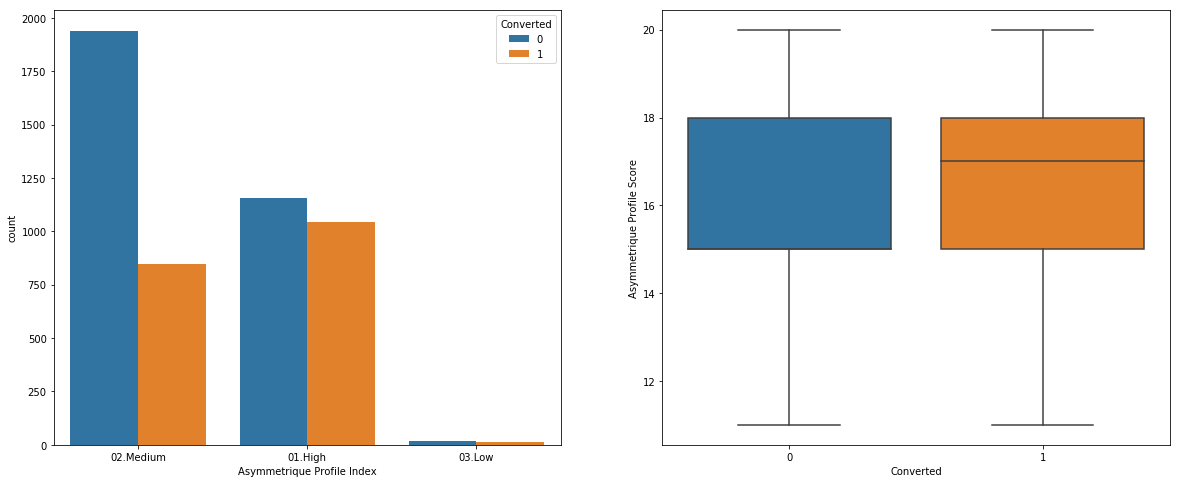

In [42]:
#Both the "Asymmetrique Profile Index" and 'Asymmetrique Profile Score' columns has 45.6% missing values.
#Let's see how valuable these columns are
print(df_dropped['Asymmetrique Profile Index'].value_counts(normalize=True)*100)

fig = plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x = "Asymmetrique Profile Index", hue = "Converted", data = df_dropped)

plt.subplot(1,2,2)
sns.boxplot(y = 'Asymmetrique Profile Score', x = 'Converted', data = df_dropped)

Surely the 'Asymmetrique Profile Score' column has not much predictive power.

In [43]:
#Let's drop the 'Asymmetrique Profile Index' and 'Asymmetrique Profile Score' columns, due to their very high null values.
df_dropped.drop(['Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis = 1, inplace = True)
print('Original DataFrame Shape:', df.shape)
print('Shape After Dropping:', df_dropped.shape)

Original DataFrame Shape: (9240, 37)
Shape After Dropping: (9240, 18)


In [44]:
#There are another four columns with null values. These are 'Lead Source', 'TotalVisits', 'Page Views Per Visit' and 'Last Activity'.
#The null values in these columns in these columns are 0.4, 1.5, 1.5 and 1.1 percent, respectively.
#Because these represents such a small percentage of dataset, even if we remove all the rows with null values, we will not loose much information.
#So, let's go ahead and remove the null values
df_dropped.dropna(inplace = True)

In [45]:
#Rechecking the number of null values in differend columns
df_dropped.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Tags                                      0
Lead Quality                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

So, there is no null value now!

### Getting Dummies

In [46]:
#Lets handle 'Yes' and 'No' values first.
binary_list =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview'] #These two columns have 'Yes' and 'No'

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df_dropped[binary_list] = df_dropped[binary_list].apply(binary_map)

df_dropped[binary_list].head(2)

,Do Not Email,Do Not Call,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0


In [47]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(df_dropped[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity', 'Country', ]], drop_first=True)

In [48]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(9074, 169)

In [49]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                           'Tags','Lead Quality','City','Last Notable Activity', 'Country'], axis = 1)
df_final.shape

(9074, 159)

### Train-Test Split

In [50]:
X = df_final.drop(['Converted','Lead Number'], axis=1)
y = df_final['Converted']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (6351, 157)
X_test Shape: (2723, 157)
y_train Shape: (6351,)
y_test Shape: (2723,)


In [52]:
X_train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
3009,0,0,2.0,397,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [53]:
scaler = StandardScaler()

In [54]:
#Scaling the numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
3009,0,0,-0.284595,-0.160255,-0.179666,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Creating The Logistic Regression Model

In [55]:
#First model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6199
Model Family:                Binomial   Df Model:                          151
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        23:03:42   Pearson chi2:                 2.41e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3.624e+15    1.1e+08   3.31e+07      0.000    3.62e+15    3.62e+15
Do Not Email                                           -4.571e+14   4.49e+06  -1.02e+08      0.000   -4.57e+14   -4.57e+14
Do Not Call                                             4.294e+15   4.78e+07   8.98e+07      0.000    4.29e+15    4.29e+15
TotalVisits                                             1.815e+13      1e+06   1.81e+07      0.000    1.81e+13    1.81e+13
Total Time Spent on Website                             3.799e+14   1.04e+06   3.65e+08      0.000     3.8e+14     3.8e+14
Page Views Per Visit                                   -2.023e+13   1.27e+06  -1.59e+07      0.000   -2.02e+13   -2.02e+13
A free copy of Mastering The Interview                 -4.018e+13   2.72e+06  -1.48e+07      0.000   -4.02e+13   -4.02e+13
Lead Origin_Landing Page Submission                    -2.021e+14   3.42e+06  -5.91e+07      0.000   -2.02e+14   -2.02e+14
Lead Origin_Lead Add Form                              -5.811e+14   4.77e+07  -1.22e+07      0.000   -5.81e+14   -5.81e+14
Lead Origin_Lead Import                                  1.95e+15   7.28e+07   2.68e+07      0.000    1.95e+15    1.95e+15
Lead Source_Direct Traffic                             -1.204e+15   6.28e+07  -1.92e+07      0.000    -1.2e+15    -1.2e+15
Lead Source_Facebook                                   -3.047e+15   9.51e+07   -3.2e+07      0.000   -3.05e+15   -3.05e+15
Lead Source_Google                                     -1.102e+15   6.28e+07  -1.76e+07      0.000    -1.1e+15    -1.1e+15
Lead Source_Live Chat                                  -7.809e+14   6.26e+07  -1.25e+07      0.000   -7.81e+14   -7.81e+14
Lead Source_NC_EDM                                      3.217e+15   9.19e+07    3.5e+07      0.000    3.22e+15    3.22e+15
Lead Source_Olark Chat                                 -7.689e+14   6.27e+07  -1.23e+07      0.000   -7.69e+14   -7.69e+14
Lead Source_Organic Search                             -1.147e+15   6.28e+07  -1.83e+07      0.000   -1.15e+15   -1.15e+15
Lead Source_Pay per Click Ads                          -3.299e+15   9.21e+07  -3.58e+07      0.000    -3.3e+15    -3.3e+15
Lead Source_Press_Release                              -4.394e+15   9.26e+07  -4.75e+07      0.000   -4.39e+15   -4.39e+15
Lead Source_Reference                                  -5.295e+14   4.08e+07   -1.3e+07      0.000    -5.3e+14    -5.3e+14
Lead Source_Referral Sites                             -1.158e+15   6.32e+07  -1.83e+07      0.000   -1.16e+15   -1.16e+15
Lead Source_Social Media                               -2.607e+14   7.89e+07  -3.31e+06      0.000   -2.61e+14   -2.61e+14
Lead Source_WeLearn                                       25.2666   1.69e-06   1.49e+07

#### RFE

In [56]:
#Let's take help of RFE to select top 15 features
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 89),
 ('TotalVisits', False, 87),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 100),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', False, 15),
 ('Lead Origin_Lead Import', False, 119),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 132),
 ('Lead Source_NC_EDM', False, 34),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Pay per Click Ads', False, 136),
 ('Lead Source_Press_Release', False, 124),
 ('Lead Source_Reference', False, 102),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 103),
 ('Lead Source_WeLearn', False, 143),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 127),
 ('Lead Source_blog', Fal

In [58]:
rfe_col = X_train.columns[rfe.support_] #list of top 15 columns

In [59]:
#Creating the 2nd model with the RFE recommended top 15 columns
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.8
Date:                Mon, 26 Aug 2019   Deviance:                       2365.6
Time:                        23:03:47   Pearson chi2:                 1.36e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.6791      0.194    -13.810      0.000      -3.059      -2.299
Do Not Email                                 -1.4639      0.258     -5.678      0.000      -1.969      -0.959
Lead Source_Welingak Website                  2.6262      0.744      3.529      0.000       1.168       4.085
Last Activity_SMS Sent                        2.3401      0.125     18.718      0.000       2.095       2.585
What is your current occupation_Uneployed    -2.6122      0.150    -17.400      0.000      -2.906      -2.318
Tags_Busy                                     1.7094      0.290      5.891      0.000       1.141       2.278
Tags_Closed by Horizzon                       8.3470      0.741     11.270      0.000       6.895       9.799
Tags_Lost to EINS                             9.3755      0.789     11.876      0.000       7.828      10.923
Tags_Ringing                                 -2.2879      0.305     -7.497      0.000      -2.886      -1.690
Tags_Unknown                                  3.1811      0.223     14.278      0.000       2.744       3.618
Tags_Will revert after reading the email      6.2460      0.259     24.108      0.000       5.738       6.754
Tags_invalid number                         -22.6065   1.48e+04     -0.002      0.999   -2.91e+04     2.9e+04
Tags_switched off                            -2.3106      0.553     -4.179      0.000      -3.394      -1.227
Tags_wrong number given                     -22.5935   2.05e+04     -0.001      0.999   -4.01e+04    4.01e+04
Lead Quality_Worst                           -2.4185      0.827     -2.924      0.003      -4.040      -0.797
Last Notable Activity_Modified               -1.5761      0.130    -12.132      0.000      -1.831      -1.321
=============================================================================================================
"""

In [60]:
#3rd model
X_train_sm = X_train_sm.drop('Tags_invalid number', axis = 1) # 'Tags_invalid number' has high p-value; let's drop it
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.6
Date:                Mon, 26 Aug 2019   Deviance:                       2381.2
Time:                        23:03:47   Pearson chi2:                 1.31e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.8856      0.195    -14.766      0.000      -3.269      -2.503
Do Not Email                                 -1.4576      0.257     -5.680      0.000      -1.961      -0.955
Lead Source_Welingak Website                  2.6287      0.743      3.536      0.000       1.172       4.086
Last Activity_SMS Sent                        2.2918      0.123     18.569      0.000       2.050       2.534
What is your current occupation_Uneployed    -2.5982      0.149    -17.417      0.000      -2.891      -2.306
Tags_Busy                                     1.9424      0.288      6.752      0.000       1.379       2.506
Tags_Closed by Horizzon                       8.5287      0.742     11.500      0.000       7.075       9.982
Tags_Lost to EINS                             9.5445      0.790     12.085      0.000       7.997      11.093
Tags_Ringing                                 -2.0414      0.302     -6.755      0.000      -2.634      -1.449
Tags_Unknown                                  3.3880      0.224     15.151      0.000       2.950       3.826
Tags_Will revert after reading the email      6.4428      0.261     24.716      0.000       5.932       6.954
Tags_switched off                            -2.0623      0.551     -3.743      0.000      -3.142      -0.982
Tags_wrong number given                     -21.3528   1.24e+04     -0.002      0.999   -2.44e+04    2.44e+04
Lead Quality_Worst                           -2.4054      0.829     -2.902      0.004      -4.030      -0.781
Last Notable Activity_Modified               -1.5453      0.130    -11.926      0.000      -1.799      -1.291
=============================================================================================================
"""

In [61]:
#4th Model
X_train_sm = X_train_sm.drop('Tags_wrong number given', axis = 1) #'Tags_wrong number given' has high p-value, let's drop it
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.2
Date:                Mon, 26 Aug 2019   Deviance:                       2388.4
Time:                        23:03:47   Pearson chi2:                 1.30e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.9825      0.196    -15.225      0.000      -3.366      -2.599
Do Not Email                                 -1.4622      0.256     -5.717      0.000      -1.963      -0.961
Lead Source_Welingak Website                  2.6310      0.743      3.540      0.000       1.174       4.088
Last Activity_SMS Sent                        2.2724      0.123     18.487      0.000       2.032       2.513
What is your current occupation_Uneployed    -2.5927      0.149    -17.420      0.000      -2.884      -2.301
Tags_Busy                                     2.0508      0.286      7.159      0.000       1.489       2.612
Tags_Closed by Horizzon                       8.6186      0.742     11.616      0.000       7.164      10.073
Tags_Lost to EINS                             9.6256      0.790     12.185      0.000       8.077      11.174
Tags_Ringing                                 -1.9282      0.301     -6.410      0.000      -2.518      -1.339
Tags_Unknown                                  3.4864      0.224     15.584      0.000       3.048       3.925
Tags_Will revert after reading the email      6.5382      0.261     25.043      0.000       6.026       7.050
Tags_switched off                            -1.9482      0.550     -3.541      0.000      -3.027      -0.870
Lead Quality_Worst                           -2.3596      0.833     -2.832      0.005      -3.993      -0.726
Last Notable Activity_Modified               -1.5368      0.129    -11.869      0.000      -1.791      -1.283
=============================================================================================================
"""

Now all the values are significant

In [62]:
#Prediction on the train dataset
y_train_pred = res.predict(X_train_sm)
type(y_train_pred)

pandas.core.series.Series

In [63]:
y_train_pred = y_train_pred.values.reshape(-1) #converting to numpy array
type(y_train_pred)

numpy.ndarray

In [64]:
#Creating dataframe with the probability values of converting
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred_prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index #Here 'Index' is the index of the original dataframe df

In [65]:
y_train_pred_final.head()

,Converted,Converted_pred_prob,Index
0,0,0.110196,3009
1,0,0.277227,1012
2,0,0.015142,9226
3,1,0.545793,4750
4,1,0.999376,7987


In [66]:
#Let's take the cutoff value of 0.5 first
y_train_pred_final['Converted_pred'] = y_train_pred_final.Converted_pred_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred_prob,Index,Converted_pred
0,0,0.110196,3009,0
1,0,0.277227,1012,0
2,0,0.015142,9226,0
3,1,0.545793,4750,1
4,1,0.999376,7987,1


In [67]:
#Generating the confusion metrics
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)
print(conf)

[[3703  202]
 [ 209 2237]]


In [68]:
# Predicted     not_converted  Converted
# Actual
# not_converted        3703      202
# converted            202      2237

In [69]:
#Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_pred))

0.9352857817666509


In [70]:
TP = conf[1,1] #true positive 
TN = conf[0,0] #true negatives
FP = conf[0,1] #false positives
FN = conf[1,0] #false negatives

In [71]:
#The sensitivity
TP / float(TP+FN)

0.9145543744889616

In [72]:
#Specificity
TN / float(TN+FP)

0.9482714468629961

In [73]:
#False postive rate
print(FP/float(TN+FP))

0.05172855313700384


In [74]:
#Positive predictive value 
print (TP / float(TP+FP))

0.9171791717917179


In [75]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9465746421267893


#### VIF

In [76]:
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [77]:
VIF(X_train_sm.drop('const', axis = 1))

,Features,VIF
8,Tags_Unknown,5.05
3,What is your current occupation_Uneployed,4.76
2,Last Activity_SMS Sent,1.66
12,Last Notable Activity_Modified,1.54
9,Tags_Will revert after reading the email,1.37
1,Lead Source_Welingak Website,1.14
7,Tags_Ringing,1.13
0,Do Not Email,1.12
11,Lead Quality_Worst,1.10
5,Tags_Closed by Horizzon,1.06


#### The ROC curve

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_pred_prob, drop_intermediate = False )

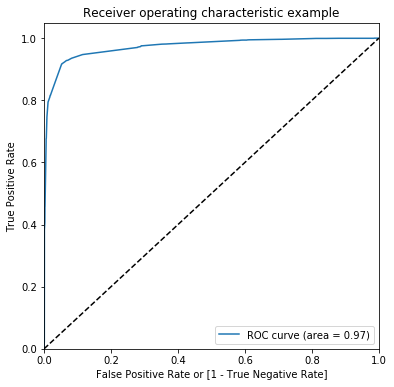

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.56081946e-04, 2.56081946e-04, 2.56081946e-04,
        2.56081946e-04, 2.56081946e-04, 7.68245839e-04, 7.68245839e-04,
        7.68245839e-04, 1.02432778e-03, 1.02432778e-03, 1.02432778e-03,
        1.02432778e-03, 1.02432778e-03, 1.02432778e-03, 1.02432778e-03,
        1.02432778e-03, 2.30473752e-03, 2.30473752e-03, 2.30473752e-03,
        2.56081946e-03, 2.56081946e-03, 2.56081946e-03, 2.56081946e-03,
        2.81690141e-03, 6.14596671e-03, 6.14596671e-03, 6.65813060e-03,
        8.19462228e-03, 8.19462228e-03, 8.19462228e-03, 8.45070423e-03,
        8.45070423e-03, 1.17797695e-02, 1.17797695e-02, 1.17797695e-02,
        1.74135723e-02, 1.74135723e-02, 1.86939821e-02, 1.86939821e-02,
        1.89500640e-02, 3.50832266e-02, 5.17285531e-02, 5.19846351e-02,
        5.32650448e-02, 5.37772087e-02, 6.14596671e-02, 6.68373880e-02,
        7.09346991e-02, 8.22023047e-02, 8.45070423e-02, 1.149807

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pred_prob)

#### Gini index

In [81]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [82]:
auc = auc_val(fpr,tpr)
auc

0.9726599543742792

In [83]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pred_prob,Index,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.110196,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.277227,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.015142,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.545793,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.999376,7987,1,1,1,1,1,1,1,1,1,1,1


In [84]:
#Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.816564  0.971382  0.719590
0.2   0.2  0.908991  0.947261  0.885019
0.3   0.3  0.932766  0.923549  0.938540
0.4   0.4  0.935286  0.917825  0.946223
0.5   0.5  0.935286  0.914554  0.948271
0.6   0.6  0.926311  0.864677  0.964917
0.7   0.7  0.917651  0.816026  0.981306
0.8   0.8  0.913399  0.793949  0.988220
0.9   0.9  0.894505  0.739575  0.991549


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

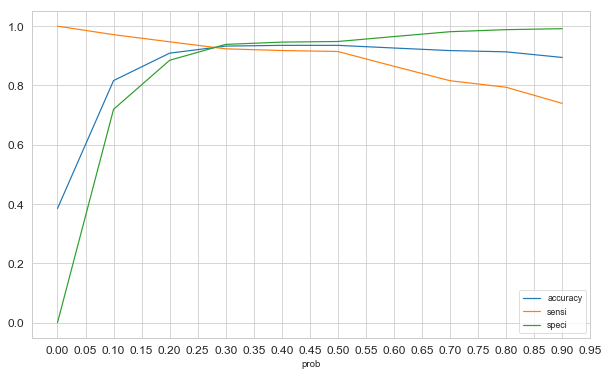

In [85]:
#plot of accuracy, sensitivity and specificity for various probabilities
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)

In [86]:
#Final dataframe with cutoff of 0.27
y_train_pred_final['final_prediction'] = y_train_pred_final.Converted_pred_prob.map( lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Converted_pred_prob,Index,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.110196,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.277227,1012,0,1,1,1,0,0,0,0,0,0,0,1
2,0,0.015142,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.545793,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.999376,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [87]:
#Assigning Lead_score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_pred_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_pred_prob,Index,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction,Lead_Score
0,0,0.110196,3009,0,1,1,0,0,0,0,0,0,0,0,0,11
1,0,0.277227,1012,0,1,1,1,0,0,0,0,0,0,0,1,28
2,0,0.015142,9226,0,1,0,0,0,0,0,0,0,0,0,0,2
3,1,0.545793,4750,1,1,1,1,1,1,1,0,0,0,0,1,55
4,1,0.999376,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [88]:
#Final accuracy with the cutoff 0.27
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.9289875610140136

In [89]:
#Confusion metrics with the cutoff of 0.27
conf1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
conf1

array([[3628,  277],
       [ 174, 2272]], dtype=int64)

In [90]:
TP = conf1[1,1] # true positive 
TN = conf1[0,0] # true negatives
FP = conf1[0,1] # false positives
FN = conf1[1,0] # false negatives

In [91]:
#Sensitivity
TP / float(TP+FN)

0.92886345053148

In [92]:
#Specificity
TN / float(TN+FP)

0.9290653008962868

In [93]:
#False postive rate
print(FP/ float(TN+FP))

0.0709346991037132


In [94]:
#Positive predictive value 
print (TP / float(TP+FP))

0.8913299333071792


In [95]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9542346133613887


### Precision and Recall

In [96]:
precision = conf1[1,1]/(conf1[0,1]+conf1[1,1])
precision

0.8913299333071792

In [97]:
recall = conf1[1,1]/(conf1[1,0]+conf1[1,1])
recall

0.92886345053148

In [98]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.8913299333071792

In [99]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.92886345053148

#### Precision and Recall Tradeoff

In [100]:
y_train_pred_final.Converted, y_train_pred_final.final_prediction

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      1
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred_prob)

([<matplotlib.axis.XTick at 0x22776bb08d0>,
 <a list of 20 Text xticklabel objects>)

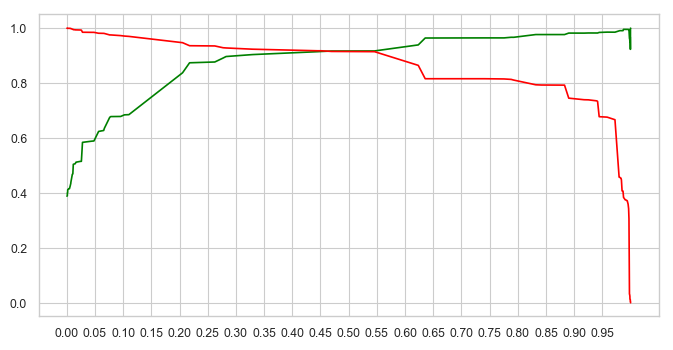

In [102]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))

The precision and recall tradeoff siggested a cutoff of 0.47 but we already got our expected result with the value of 0.27. So we will stick with that

### F1 score

In [103]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9097097097097098

### Prediction on The Test Set

In [104]:
#Standardizing the data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head(3)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
3271,0,0,0.102194,-0.600595,0.773206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.295588,1.887326,1.249642,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.284595,-0.752879,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#Selecting the necessary columns
X_test = X_test[list(X_train_sm.drop('const', axis = 1))]
X_test.head(3)

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Uneployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified
3271,0,0,0,1,0,0,0,0,1,0,0,0,0
1490,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,0,0,0


In [106]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [107]:
#Making prediction
y_test_pred = res.predict(X_test_sm)

In [108]:
#Creating the dataframe of the prediction
df_y_pred = pd.DataFrame(y_test_pred)
df_y_pred.head(3)

,0
3271,0.110196
1490,0.972231
7936,0.110196


In [109]:
#Dataframe of the y_test
df_y_test = pd.DataFrame(y_test)
df_y_test['Index'] = df_y_test.index
df_y_test.head(3)

,Converted,Index
3271,0,3271
1490,1,1490
7936,0,7936


In [110]:
#Removing index for both the dataframes to append them 
df_y_pred.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)

In [111]:
#Final dataframe with the original 'Converted' column and the probability values
df_y_pred_final = pd.concat([df_y_test, df_y_pred],axis=1)
df_y_pred_final.head(3)

,Converted,Index,0
0,0,3271,0.110196
1,1,1490,0.972231
2,0,7936,0.110196


In [112]:
#Renaming the column 0
df_y_pred_final= df_y_pred_final.rename(columns={ 0 : 'Converted_pred_prob'})
df_y_pred_final.head(3)

,Converted,Index,Converted_pred_prob
0,0,3271,0.110196
1,1,1490,0.972231
2,0,7936,0.110196


In [113]:
#Final dataframe of prediction
df_y_pred_final['final_prediction'] = df_y_pred_final.Converted_pred_prob.map(lambda x: 1 if x > 0.27 else 0)
df_y_pred_final.head(3)

,Converted,Index,Converted_pred_prob,final_prediction
0,0,3271,0.110196,0
1,1,1490,0.972231,1
2,0,7936,0.110196,0


In [114]:
#The overall accuracy in the test set
metrics.accuracy_score(df_y_pred_final.Converted, df_y_pred_final.final_prediction)

0.9283878075651855

In [115]:
#Generating confusion metrics, for test set
conf2 = metrics.confusion_matrix(df_y_pred_final.Converted, df_y_pred_final.final_prediction)
conf2

array([[1614,  120],
       [  75,  914]], dtype=int64)

In [116]:
TP = conf2[1,1] # true positive 
TN = conf2[0,0] # true negatives
FP = conf2[0,1] # false positives
FN = conf2[1,0] # false negatives

In [117]:
#Sensitivity
TP / float(TP+FN)

0.9241658240647118

In [118]:
#Specificity
TN / float(TN+FP)

0.9307958477508651